In [1]:
!git clone https://github.com/MarouaneMaac/CudaProgramming


fatal: destination path 'CudaProgramming' already exists and is not an empty directory.


In [2]:
!pip install ninja
!rm -rf load_inline_cuda
!mkdir load_inline_cuda

In [3]:
import torch
from torch.utils.cpp_extension import load_inline

In [4]:
torch.cuda.is_available()

True

In [5]:
cuda_source_path = './CudaProgramming/chapter_1/vector_addition.cu'

with open(cuda_source_path, 'r') as file:
    cuda_source = file.read()

In [6]:
cpp_source = "torch::Tensor vector_addition(torch::Tensor vector1, torch::Tensor vector2);"

addition_module = load_inline(
    name='vector_addition_extension',
    cpp_sources=cpp_source,
    cuda_sources=cuda_source,
    functions=['vector_addition'],
    with_cuda=True,
    verbose=True,
    extra_cuda_cflags=["-O2"],
    build_directory='./load_inline_cuda',)

In [13]:
def vector_add_python(a, b):
  c = torch.empty_like(a)
  for i in range(len(a)):
    c[i] = a[i] + b[i]
  return c

In [7]:
from time import time

In [34]:
size = int(1e8)

In [43]:
a = torch.randn(size, device='cuda', dtype=torch.float32)
b = torch.randn(size, device='cuda', dtype=torch.float32)
s = time()
addition_module.vector_addition(a, b)
e = time()
print(e-s)
gpu_time = e-s

0.0002372264862060547


In [44]:
a = torch.randn(size, device='cuda', dtype=torch.float32)
b = torch.randn(size, device='cuda', dtype=torch.float32)
s = time()
a + b
e = time()
print(e-s)
torch_gpu_time = e-s

0.00019693374633789062


In [17]:
a = torch.randn(size, device='cpu', dtype=torch.float32)
b = torch.randn(size, device='cpu', dtype=torch.float32)
s = time()
a + b
e = time()
print(e-s)
cpu_time = e-s

0.0003952980041503906


In [18]:
a = torch.randn(size, device='cpu', dtype=torch.float32)
b = torch.randn(size, device='cpu', dtype=torch.float32)
s = time()
vector_add_python(a, b)
e = time()
print(e-s)
python_cpu_time = e-s

0.9186418056488037


0.00015783309936523438


In [20]:
speedup = cpu_time / gpu_time
print(f'Speedup: {speedup}')

Speedup: 1.4977416440831075


In [24]:
def time_method(method, size, device):
  a = torch.randn(size, device=device, dtype=torch.float32)
  b = torch.randn(size, device=device, dtype=torch.float32)
  s = time()
  method(a, b)
  e = time()
  return e-s

In [29]:
x = list(range(1, 9))
gpu_times = [time_method(addition_module.vector_addition, int(10**i), device='cuda') for i in x]
torch_gpu_times = [time_method(lambda x, y: x+y, int(10**i), device='cuda') for i in x]
cpu_times = [time_method(lambda x, y: x+y, int(10**i), device='cpu') for i in x]


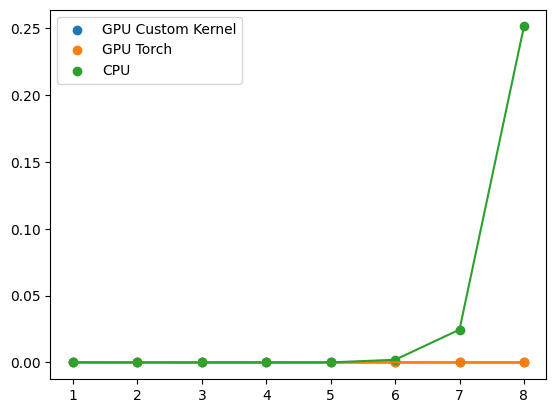

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x, gpu_times, label='GPU Custom Kernel')
plt.scatter(x, torch_gpu_times, label='GPU Torch')
plt.scatter(x, cpu_times, label='CPU')
plt.plot(x, gpu_times)
plt.plot(x, torch_gpu_times)
plt.plot(x, cpu_times)
plt.legend()
plt.show()

In [65]:
x = list(range(1, 10))
gpu_times = [time_method(addition_module.vector_addition, int(10**i), device='cuda') for i in x]
torch_gpu_times = [time_method(lambda x, y: x+y, int(10**i), device='cuda') for i in x]

In [61]:
import gc
gc.collect()
torch.cuda.empty_cache()

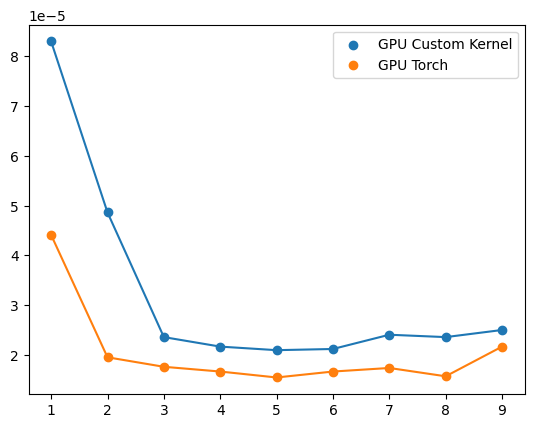

In [66]:
import matplotlib.pyplot as plt
plt.scatter(x, gpu_times, label='GPU Custom Kernel')
plt.scatter(x, torch_gpu_times, label='GPU Torch')
plt.plot(x, gpu_times)
plt.plot(x, torch_gpu_times)
plt.legend()
plt.show()